In [1]:
# Descomente para instalar as bibliotecas utilizadas neste material
# !pip install -U qiskit
# !pip install qiskit[visualization]
# !pip install numpy
# !pip install math

In [2]:
# Verificação de versão do qiskit
# Notebook originalmente executado na versão 1.2.2 do qiskit e 3.12.7 do python
from qiskit.version import get_version_info as qiskitVersion
print(qiskitVersion())

1.2.0


In [3]:
# Importação dos módulos específicos a serem utilizados durante a elaboração do circuito
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from math import pi

Criação do circuito de 3 qubits, e posterior adição de portas hadamard

In [4]:
qc = QuantumCircuit(3)

qc.h(0)
qc.h(1)
qc.h(2)

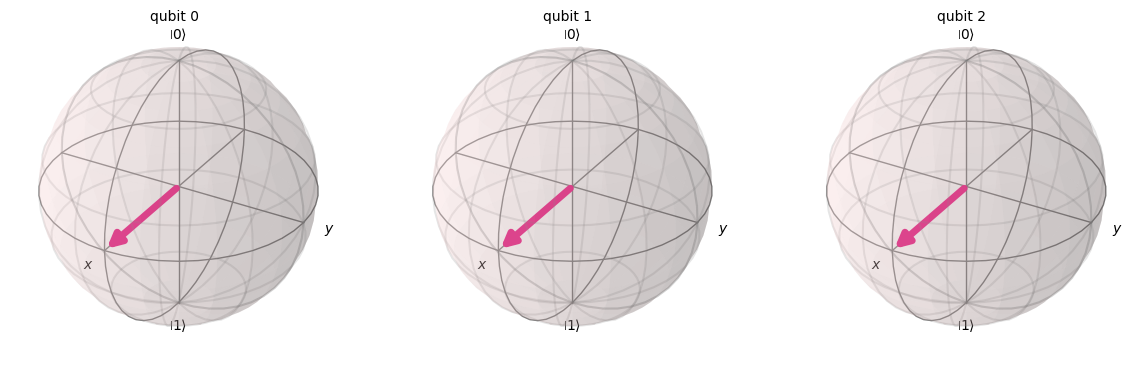

In [5]:
# Utilizado para desenhar as esferas de bloch do circuito
plot_bloch_multivector(Statevector(qc))

Aplicação de rotações teste
No primeiro (0) qubit aplicamos uma rotação z de 135 graus radianos
No segundo (1) qubit aplicamos uma rotação y de 45 graus radianos
No terceiro (2) qubit aplicamos uma rotação y de -45 graus radianos e uma rotação x de 45 graus radianos

In [6]:
qc.rz(3*pi/4,0)
qc.ry(pi/4,1)
qc.ry(-pi/4,2)
qc.rx(pi/4,2)

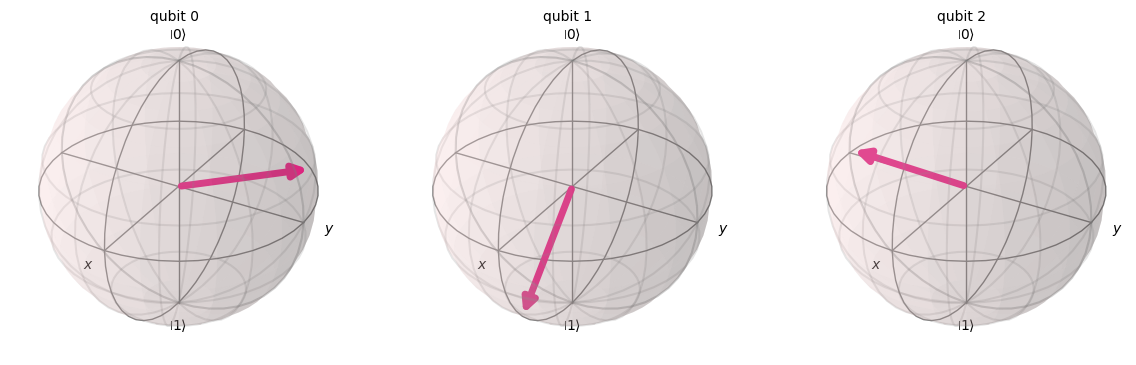

In [7]:
# Visualização das esferas pós rotações de teste
plot_bloch_multivector(Statevector(qc))

In [8]:
# Medição de todos os qubits
qc.measure_all()

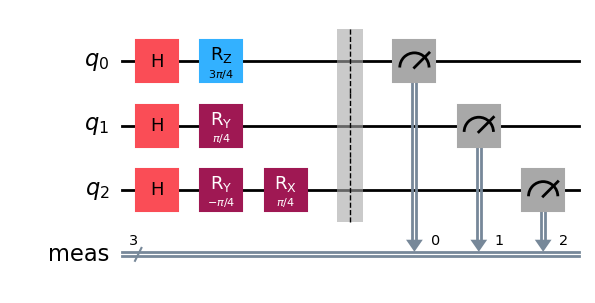

In [9]:
# Desenhar o circuito final
qc.draw("mpl")

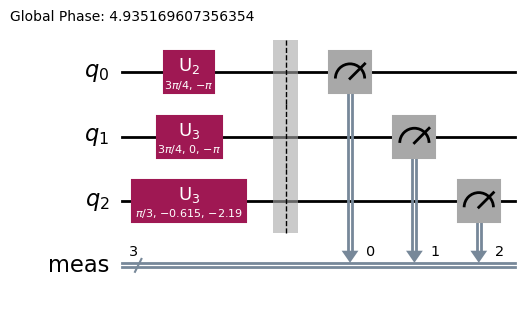

In [10]:
# Execução do ciruito via simulador
provider = BasicProvider()
backend=provider.get_backend("basic_simulator")
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit, shots=1024)
result = job.result()
new_circuit.draw("mpl")

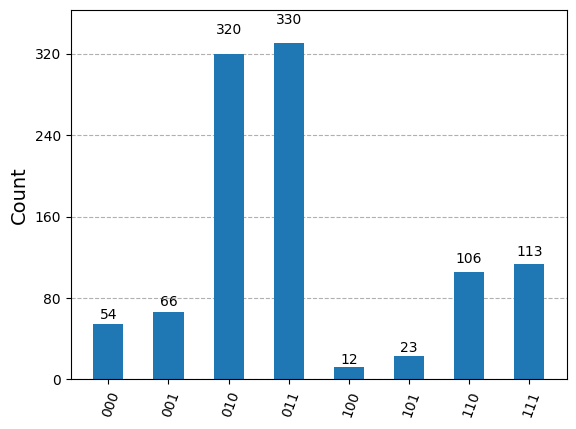

In [11]:
# Obtenção e visualização dos resultados, via histograma
counts = result.get_counts(qc)
plot_histogram(counts)